Given the following patterns

$$P_1, t_1 = (2,6) , A $$
$$P_2, t_2 = (4,4) , A $$
$$P_3, t_3 = (6,3) , A $$
$$P_4, t_4 = (4,10) , B $$
$$P_5, t_5 = (7,10) , B $$
$$P_6, t_6 = (9,8) , B $$

Train a perceptron using the perceptron rule

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [49]:
import numpy as np

#create input vector 
def createInputVector():
    p[0] = [2,6];
    p[1] = [4,4];
    p[2] = [6,3];
    p[3] = [4,10];
    p[4] = [7,10];
    p[5] = [9,8];
    print("p:",str(p));
    
p = np.zeros((6,2));
createInputVector();

p: [[ 2.  6.]
 [ 4.  4.]
 [ 6.  3.]
 [ 4. 10.]
 [ 7. 10.]
 [ 9.  8.]]


In [50]:
#create target vector A = 1 and B = 1 
def createTargetVector():
    t[0] = 1;
    t[1] = 1;
    t[2] = 1;
    t[3] = 0;
    t[4] = 0;
    t[5] = 0;
    print("t:",str(t));
    
t = np.zeros(6);
createTargetVector();

t: [1. 1. 1. 0. 0. 0.]


In [51]:
# translate perceptron output
def translatePerceptronOutput(p, output):
    if output == 1:
        print(str(p), "classified as A");
    else:
        print(str(p), "classified as B");

In [52]:
#define perceptron class
class Perceptron:
    
    def __init__(self, p_training, t_training, learning_rate ):
        self.P = p_training;
        self.T = t_training;
        self.alfa = learning_rate;
    
        self.E = np.ones(len(self.P));
        self.Errors = np.array([]);
        
        self.initW();
        self.initBias();
    
    def initW(self):
        """Initialize perceptron weights"""
        self.W = np.random.rand(len(self.P[0]));
        print("W:", str(self.W));
        
    def initBias(self):
        """Initialize perceptron bias"""
        self.bias = np.random.randint(2);
        print("bias:", self.bias);
        
        
    def trainPerceptronLearningRule(self, max_epoch):
        iterations = 0;
        self.max_epoch = max_epoch;
        
        self.plotTrainingSet();
        self.plotDecisionBoundary('red','initial boundary');
        
        while((not self.isTrainingCompleted()) and (iterations < self.max_epoch)):
            #print("Iteration------------------", iterations);
            MSE = 0;
            for index in range(len(self.P)):
                #print("input:", str(self.P[index]));
                #print("weight:", self.W);
                #print("dotProduct:", np.dot(self.P[index],self.W));
                
                #network output
                a = self.hardlim(np.dot(self.P[index],self.W) + self.bias);
                #print("a:",a);
                
                #input error
                self.E[index] = self.T[index] - a;
                #print("E:", self.E[index]);
                MSE = MSE + self.E[index]**2;
                
                #Perceptron learning rule
                self.W = self.W + self.alfa * (self.E[index] * self.P[index]);
                self.bias = self.bias + (self.alfa * self.E[index]);
                #print("new weight:", self.W);
                #print("new bias:", self.bias);
                
            iterations = iterations + 1;
            MSE = MSE / len(self.P);
            self.Errors = np.concatenate((self.Errors,[MSE]),axis=0);
        
        self.plotDecisionBoundary('green','final boundary');
        plt.legend(loc="upper right");
        print("Iterations:", iterations);
    
    def isTrainingCompleted(self):
        for error in self.E:
            if error != 0:
                return False;
        print("Training completed!")
        return True;
    
    def hardlim(self, x):
        if x >= 0:
            return 1;
        else: 
            return 0;
        
    def evaluate(self, new_p):
        return self.hardlim(np.dot(new_p,self.W) + self.bias);
    
    def plotDecisionBoundary(self, color, label):
        print('bias:',self.bias);
        print('W:',self.W);
        plt.xlim([-1.0, 15.0]);
        plt.ylim([-1.0, 15.0]);
        
        x = np.linspace(-1, 15);
        y = - (self.bias / self.W[1]) - ((x * self.W[0]) / self.W[1]);
        plt.plot(x, y, color=color, label=label);
    
    def plotTrainingSet(self):
        
        plt.plot(self.P[0:3,0],self.P[0:3,1], 's', color='black', label='A');
        plt.plot(self.P[3:7,0],self.P[3:7,1], '^', color='black', label='B');
    
    def plotErrors(self):
        plt.plot(self.Errors, label='Error');
        print("Last error:", self.Errors[-1]);
        
        

In [53]:
#create perceptron object
perc = Perceptron(p,t, 0.0015);

W: [0.69962698 0.29175562]
bias: 1


bias: 1
W: [0.69962698 0.29175562]
Training completed!
bias: 0.973000000000001
W: [ 0.03212698 -0.17024438]
Iterations: 69


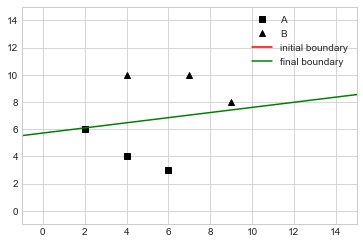

In [54]:
#train perceptron using perceptron rule, max epoch 50,000
perc.trainPerceptronLearningRule(50000);

In [55]:
#evaluate new coordenate (5,5)
new_p = np.array([5,5])
res = perc.evaluate(new_p);
translatePerceptronOutput(new_p,res);

[5 5] classified as A


In [56]:
#evaluate new coordenate (6,8)
new_p = np.array([6,8])
res = perc.evaluate(new_p);
translatePerceptronOutput(new_p,res);

[6 8] classified as B


Last error: 0.0


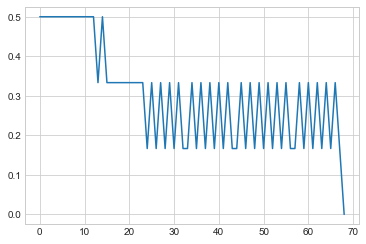

In [57]:
perc.plotErrors();

important notes:
* initialization of weights and bias with random values don´t affect to find a solution
* solution could be different based on initial values and for that reason new inputs could be classified different.
* learning rate alters the speed of the training process 
* 